# Modeling without class balancing

In [7]:
# Load libraries and data

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier # Need to pip install
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#loading data
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the file from Google Drive
file_path = '/content/drive/My Drive/Fall 2024/ML Project/churn-data.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Data Manipulation
df = df.drop(['customerID'], axis = 1)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.fillna(df["TotalCharges"].mean()) # May be unnecessary since we're dropping nans in line above

df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# Data Preprocessing

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))

X = df.drop(columns = ['Churn'])
y = df['Churn'].values

# Check class balance
print("Class (im)balance:")
print(pd.Series(y).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 4, stratify=y)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Class (im)balance:
0    5163
1    1869
Name: count, dtype: int64


In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [11]:
# Modeling KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

print(classification_report(y_test, predicted_y))

KNN accuracy: 0.7786729857819905
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [13]:
# Modeling SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

print(classification_report(y_test, predict_y))

SVM accuracy is : 0.7938388625592417
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1549
           1       0.66      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [16]:
# Modeling Random Forest with sqrt
model_rf = RandomForestClassifier(
    n_estimators=500, oob_score=True, n_jobs=-1,
    random_state=50, max_features="sqrt",  # Replace 'auto' with 'sqrt'
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

0.8028436018957346
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.69      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [17]:
# Modeling Random Forest with log2
model_rf = RandomForestClassifier(
    n_estimators=500, oob_score=True, n_jobs=-1,
    random_state=50, max_features="log2",
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

0.8028436018957346
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.69      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



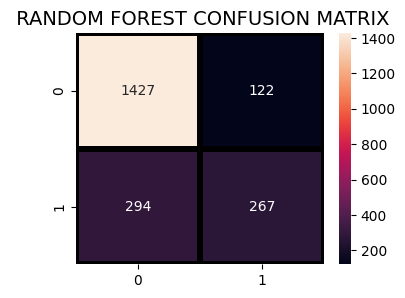

In [18]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

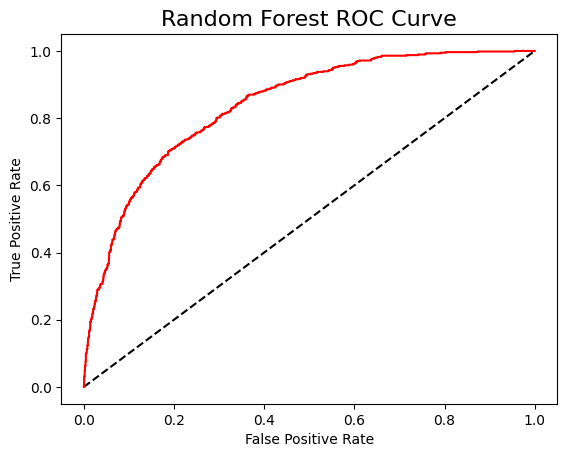

In [19]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Logistic Regression accuracy is : 0.8061611374407583
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



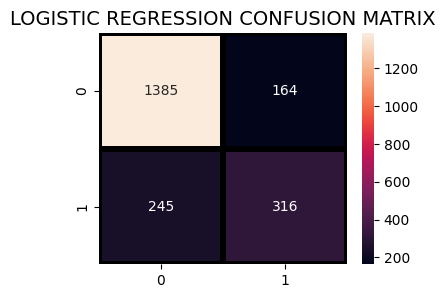

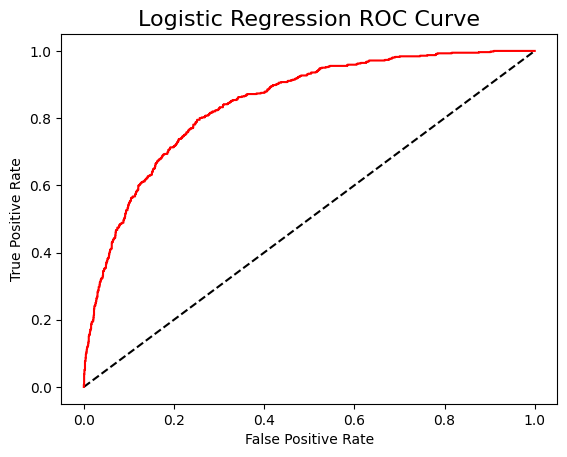

In [25]:
# Modeling Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [26]:
# Modeling Decision Tree Classifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.718957345971564
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.47      0.50      0.49       561

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.72      0.72      0.72      2110



AdaBoost Classifier accuracy
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.54      0.61       561

    accuracy                           0.81      2110
   macro avg       0.77      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



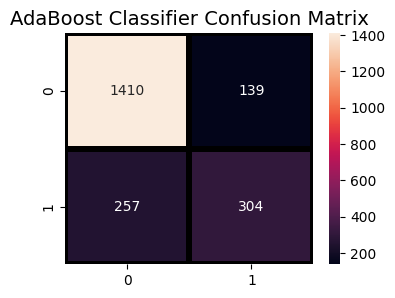

In [28]:
# Modeling AdaBoost Classifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

print(classification_report(y_test, a_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier 0.8042654028436019
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



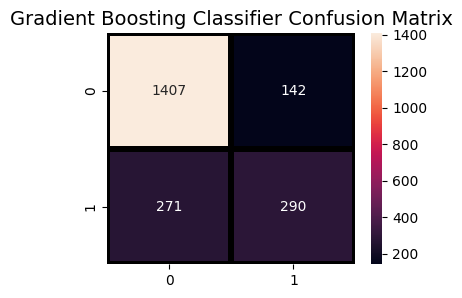

In [29]:
# Modeling Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Final Accuracy Score 
0.8085308056872038
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



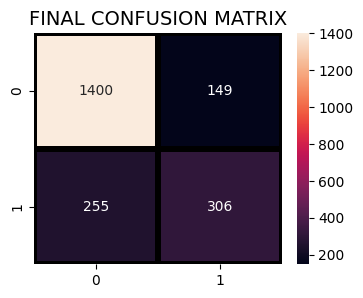

In [31]:
# Modeling Ensemble Voting Classifier

from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

# Modeling with oversampling of minority class with SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

# Resampling the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
# Modeling KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

print(classification_report(y_test, predicted_y))

KNN accuracy: 0.7009478672985782
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1549
           1       0.46      0.77      0.58       561

    accuracy                           0.70      2110
   macro avg       0.68      0.72      0.67      2110
weighted avg       0.78      0.70      0.72      2110



In [35]:
# Modeling SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

print(classification_report(y_test, predict_y))

SVM accuracy is : 0.7611374407582938
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1549
           1       0.54      0.76      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.76      0.77      2110



In [37]:
# Modeling Random Forest with sqrt
model_rf = RandomForestClassifier(
    n_estimators=500, oob_score=True, n_jobs=-1,
    random_state=50, max_features="sqrt",  # Replace 'auto' with 'sqrt'
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

0.8028436018957346
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.69      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [38]:
# Modeling Random Forest with log2
model_rf = RandomForestClassifier(
    n_estimators=500, oob_score=True, n_jobs=-1,
    random_state=50, max_features="log2",
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

print(classification_report(y_test, prediction_test))

0.8028436018957346
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.69      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [39]:
# Modeling Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.8061611374407583
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [40]:
# Modeling Decision Tree Classifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7137440758293839
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1549
           1       0.46      0.49      0.48       561

    accuracy                           0.71      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.71      0.72      2110



In [43]:
# Modeling AdaBoost Classifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
accuracy_dt = a_model.score(X_test,y_test)
print("AdaBoost Classifier accuracy is :", accuracy_dt)
metrics.accuracy_score(y_test, a_preds)

print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy is : 0.8123222748815165
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.54      0.61       561

    accuracy                           0.81      2110
   macro avg       0.77      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [44]:
# Modeling Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))

Gradient Boosting Classifier 0.8042654028436019
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [45]:
# Modeling Ensemble Voting Classifier

from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

Final Accuracy Score 
0.8085308056872038
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

